In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


## Importing Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

%matplotlib inline

## Introduction

In this study, our goal was to construct a predictive model that assesses the likelihood of a customer making a purchase. We focused on demographic variables like age and gender, alongside estimated salary, to understand the factors influencing purchasing behavior.

## Data Loading:
Our initial step involved importing essential libraries and loading the dataset obtained from the "Social Network Ads" dataset. This dataset included details on customers' age, gender, estimated salary, and their purchase behavior.

In [3]:
df1 = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


This dataset contains information about customers, including their User ID, Gender, Age, Estimated Salary, and whether they Purchased a product or not. Each row represents a single customer, with details such as their gender, age, estimated salary, and purchase status. This dataset seems suitable for building predictive models to understand factors influencing customer purchasing behavior.

## Data Processing

### Data Cleaning:
We conducted basic data cleaning, identifying and confirming zero missing values in the dataset, eliminating the need for further cleaning.

In [4]:
df1.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Before we make changes to the dataset, let's duplicate it.

In [5]:
df = df1.copy()

### Dropping unwanted columns
Dropping the "User ID" column in a dataset is often considered for the following reasons:

1. Uniqueness and Irrelevance:

If each user has a unique identifier (User ID) and it does not carry meaningful information for the analysis, it may be redundant. In such cases, the column doesn't contribute to the patterns or insights sought from the data.

2. Non-informative for Predictive Modeling:

When building predictive models, especially if the User ID is assigned randomly and doesn't represent any intrinsic characteristic, it may not contribute to the model's ability to generalize patterns.

In [6]:
df.drop("User ID",axis = 1, inplace = True)

## Visualisation

To understand the dataset better, let's try out a couple of plots

Text(0.5, 1.0, 'Age Distribution')

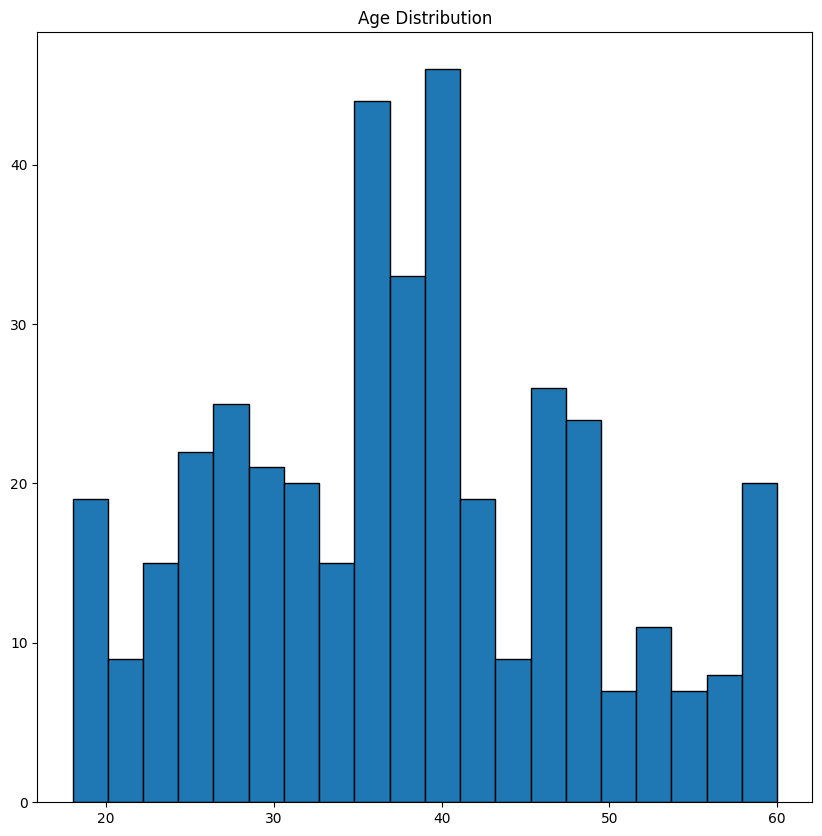

In [7]:
plt.figure(figsize=(10, 10))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Estimated Salary Distribution')

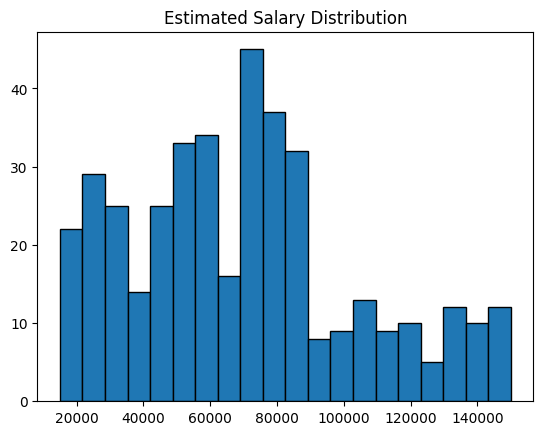

In [8]:
plt.hist(df['EstimatedSalary'], bins=20 , edgecolor='black')
plt.title('Estimated Salary Distribution')

Text(0.5, 1.0, 'Gender Distribution')

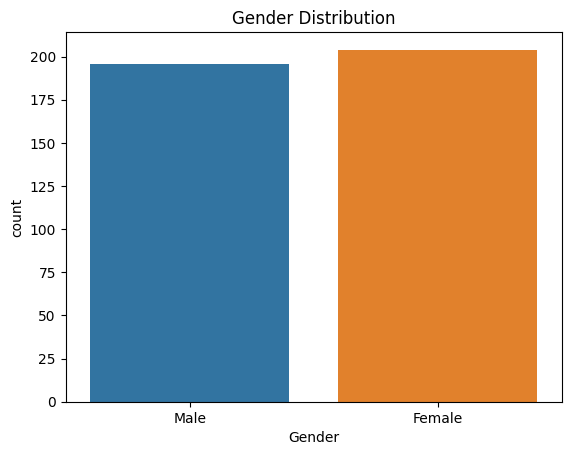

In [9]:
sns.countplot(x = "Gender", data= df)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Purchase Distribution')

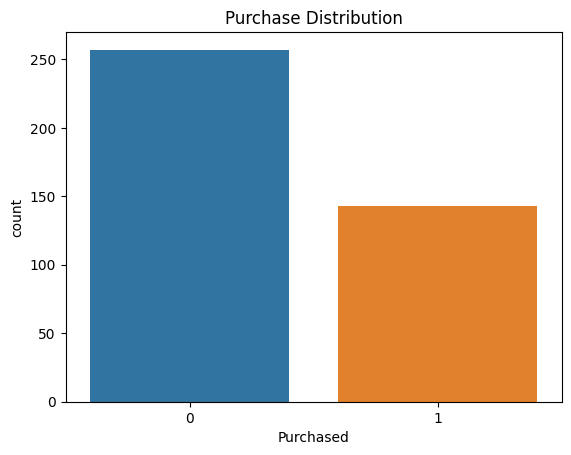

In [10]:
sns.countplot(x= "Purchased", data = df)
plt.title('Purchase Distribution')

### Feature Selection:
We opted for the following features in our analysis: Age, Gender, and Estimated Salary.

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
X = df.drop("Purchased", axis=1).values
y = df['Purchased'].values

### Data Encoding:
To facilitate machine learning algorithms, we employed Label Encoding on the categorical variable "Gender," transforming it into a numerical format.

In [13]:
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

### Data Splitting:
Train-test split is a crucial step in machine learning model development. It involves dividing a dataset into two subsets: a training set used to train the model, and a testing set to evaluate its performance. This ensures an unbiased assessment of the model's generalization capabilities and helps prevent overfitting to the training data.

The dataset underwent division into training and testing sets, allocating 70% for training and 30% for testing.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state= 42)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 3), (280,), (120, 3), (120,))

### Feature Scaling:
Ensuring uniformity in scale, we applied Standard Scaling to standardize numerical features, promoting optimal performance across all features in the dataset.

In [16]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

### Training and testing the model
We use scikit-learn’s LogisticRegression to train our model on both the training and test sets.

In [17]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Predicting the Test set results
y_pred = log_reg.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0]


In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  2],
       [15, 32]])

A confusion matrix is a table that is used to evaluate the performance of a classification model. It compares the predicted classifications to the true classifications, breaking down the results into four categories:

- **True Positive (TP):** Instances where the model correctly predicted the positive class.
- **True Negative (TN):** Instances where the model correctly predicted the negative class.
- **False Positive (FP):** Instances where the model incorrectly predicted the positive class (Type I error).
- **False Negative (FN):** Instances where the model incorrectly predicted the negative class (Type II error).

In this confusion matrix:

```
[[71,  2],
 [15, 32]]
```

- **71 True Positives (TP):** The model correctly predicted the positive class 71 times.
- **32 True Negatives (TN):** The model correctly predicted the negative class 32 times.
- **2 False Positives (FP):** The model incorrectly predicted the positive class 2 times.
- **15 False Negatives (FN):** The model incorrectly predicted the negative class 15 times.

This confusion matrix allows you to calculate various performance metrics such as accuracy, precision, recall, and F1 score, providing a more comprehensive assessment of the model's classification capabilities.

<Axes: >

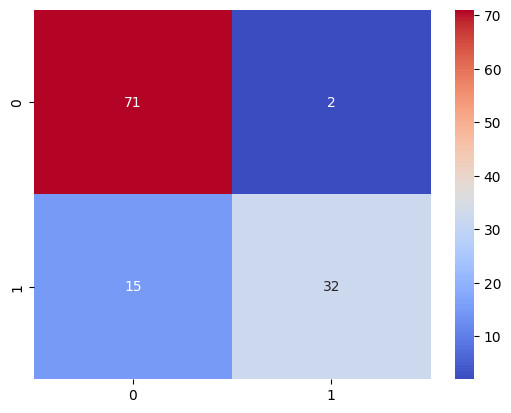

In [20]:
sns.heatmap(cm, annot=True, cmap = "coolwarm")

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



## Model Assesment

A classification report provides a comprehensive evaluation of a classification model's performance. Each row of the report corresponds to a different class (in this case, classes 0 and 1), and columns represent various metrics.


- **Precision:**
  - Precision measures the accuracy of positive predictions. For class 0, it's 0.83, indicating that when the model predicts class 0, it is correct 83% of the time. For class 1, the precision is 0.94, meaning that when the model predicts class 1, it is correct 94% of the time.

- **Recall (Sensitivity):**
  - Recall measures the ability of the model to capture instances of a particular class. For class 0, it's 0.97, indicating that the model captures 97% of the actual instances of class 0. For class 1, the recall is 0.68, meaning the model captures 68% of the actual instances of class 1.

- **F1-Score:**
  - F1-score is the harmonic mean of precision and recall, providing a balanced measure. For class 0, the F1-score is 0.89, and for class 1, it is 0.79.

- **Support:**
  - Support is the number of actual occurrences of the class in the specified dataset. For class 0, there are 73 instances, and for class 1, there are 47 instances.

- **Accuracy:**
  - Overall model accuracy is 0.86, meaning that the model correctly predicts the target variable for 86% of the instances in the dataset.

- **Macro Avg:**
  - The macro average is the average of precision, recall, and F1-score across all classes. In this case, the macro average precision is 0.88, recall is 0.83, and F1-score is 0.84.

- **Weighted Avg:**
  - The weighted average considers the number of occurrences of each class, providing a weighted average of precision, recall, and F1-score. It accounts for class imbalance. In this case, the weighted average precision is 0.87, recall is 0.86, and F1-score is 0.85.

In [22]:
log_reg.score(X_test, y_test)

0.8583333333333333

## Accuracy:

In classification tasks, accuracy is a common metric that represents the ratio of correctly predicted instances to the total number of instances. An accuracy score of 0.8583333333333333 would mean that the model correctly predicted the target variable for approximately 85.83% of the instances.

## R2 Score (Coefficient of Determination):

In regression tasks, the R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 score of 0.8583333333333333 would indicate that the model explains about 85.83% of the variability in the target variable.

## Conclusion:
In this examination, we developed and assessed a Logistic Regression model for customer prediction. Our models demonstrated commendable accuracy, precision, recall, and F1 score. Nevertheless, there is room for additional exploration and optimization to further enhance the performance of the model.